In [1]:
from model import Users, Posts, Replies, Topics, TopicUser, Provs, Industry
from peewee import *

In [2]:
p = (Posts.select(fn.Count(Posts.id).alias('pcount'), fn.strftime('%Y%m%d', Posts.updated_at).alias('date'))
     .where(SQL('date').is_null(False))
     .group_by(SQL('date'))
     .order_by(SQL('date')))
r = (Replies.select(fn.Count(Replies.id).alias('rcount'), fn.strftime('%Y%m%d', Replies.updated_at).alias('date'))
     .group_by(SQL('date'))
     .order_by(SQL('date')))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pdf = pd.DataFrame(list(p.dicts()))
rdf = pd.DataFrame(list(r.dicts()))

In [4]:
df = pd.merge(pdf, rdf, on='date')
df.date = pd.to_datetime(df.date)
df.tail(8)


,date,pcount,rcount
1970,2017-12-24,56,908
1971,2017-12-25,107,1660
1972,2017-12-26,116,1511
1973,2017-12-27,152,1649
1974,2017-12-28,147,1663
1975,2017-12-29,145,1680
1976,2017-12-30,91,1212
1977,2017-12-31,72,942


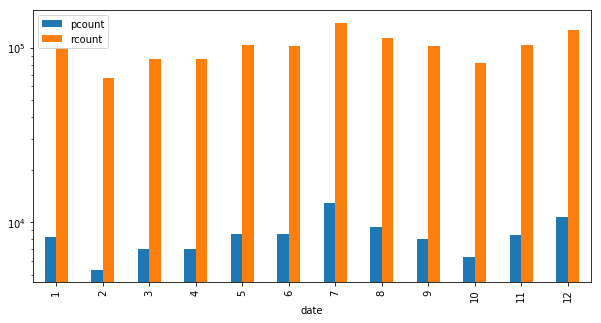

In [5]:
dfm = df.groupby(df.date.dt.month).sum()
dfm.plot.bar(figsize=(10, 5), logy=True)

In [6]:
dfg = df.groupby(df.date.dt.to_period('M')).sum()
dfg['ratio'] = dfg.rcount / dfg.pcount

dfg.head(8)

,pcount,rcount,ratio
date,,,
2012-06,54,106,1.962963
2012-07,94,166,1.765957
2012-08,81,314,3.876543
2012-09,72,340,4.722222
2012-10,50,298,5.960000
2012-11,72,313,4.347222
2012-12,88,252,2.863636
2013-01,140,800,5.714286


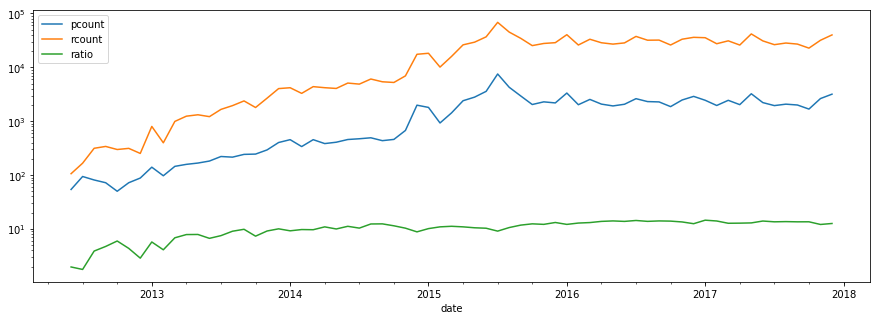

In [7]:
dfg.plot(figsize=(15,5), logy=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x105173748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ab98b00>], dtype=object)

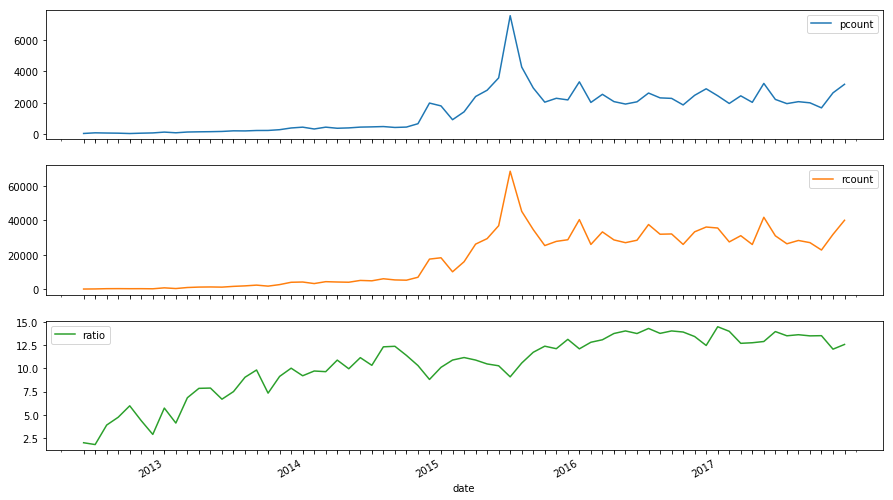

In [8]:
dfg.plot(xticks=dfg.index, subplots=True, figsize=(15,9))